## Fitting Free-Floating Planet Microlensing Events
MulensModel is a Python package for modeling microlensing events, including those from free-floating planets [(Poleski & Yee 2019)](https://arxiv.org/abs/1803.01003v3). This notebook contains an example of an optimized microlensing model, adapted from the MulensModel documentation. Data for the example lens, OGLE-2016-BLG-1195, was published in [Shvartzvald et al. 2017](http://adsabs.harvard.edu/abs/2017ApJ...840L...3S), "An Earth-mass Planet in a 1 au Orbit around an Ultracool Dwarf".

In [1]:
# Imports

# Standard
import sys
import os
import numpy as np
import scipy.optimize as op
import matplotlib.pyplot as plt

# MulensModel
import MulensModel
from MulensModel import Event, Model, MulensData

In [2]:
# Read in data file
# file_name = "MulensModel/data/photometry_files/phot_ob08092_O4.dat"
file_name = "KCT01I.dat"
data = MulensData(file_name = file_name)

# Confirm import
print("{:} file was imported".format(file_name))

KCT01I.dat file was imported


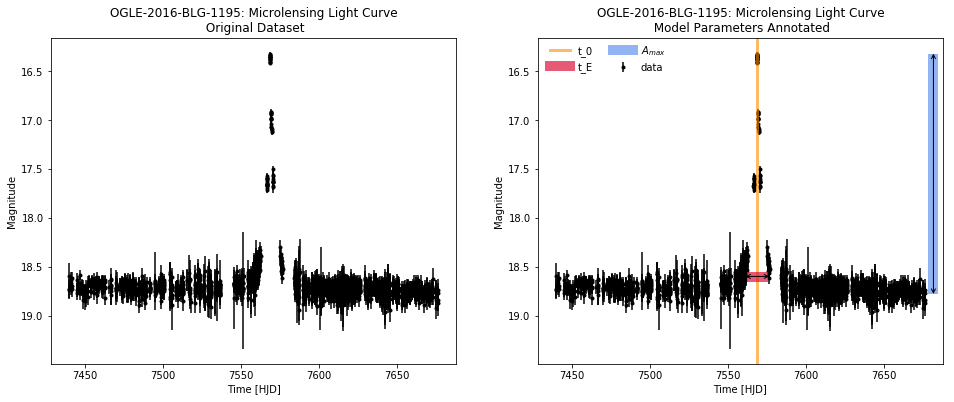

In [3]:
# Plot the data, indicate model parameters
plt.figure(figsize = (16, 6))

plt.subplot(1, 2, 1)
plt.errorbar(data.time, data.mag, yerr = data.err_mag, fmt = '.', color = 'k')

plt.title("OGLE-2016-BLG-1195: Microlensing Light Curve\n Original Dataset")
plt.ylabel("Magnitude")
plt.xlabel("Time [HJD]")
plt.gca().invert_yaxis()


plt.subplot(1, 2, 2)

# Data
plt.errorbar(data.time, data.mag, yerr = data.err_mag, fmt = '.', color = 'k', label = "data", zorder = 1)

# Model parameters
# t_0 describes the time at which the microlensing signal peaks, as observed in the above plot
plt.axvline(x = 7569., color = "darkorange", label = "t_0", zorder = 2, linewidth = 3, alpha = 0.6)

# t_E describes the characteristic timescale of the microlensing event
plt.axhline(y = 18.602, xmin = 0.528, xmax = 0.555, linewidth = 10, color = 'crimson', \
            label = "t_E", zorder = 3, alpha = 0.7)
plt.annotate(s = '', xy = (7560.,18.6), xytext = (7578.,18.6), arrowprops = dict(arrowstyle='<->'))

# The model parameter in question is u_0, the impact parameter between lens and source
# u_0 ~ (100**(A/5))**(-1) where A is the magnification of the source signal
plt.axvline(x = 7682.02, ymin = 0.23, ymax = 0.934, linewidth = 10, color = 'cornflowerblue', \
            label = "$A_{max}$", zorder = 3, alpha = 0.7)
plt.annotate(s = '', xy = (7682.,18.8), xytext = (7682.,16.3), arrowprops = dict(arrowstyle='<->'))

plt.title("OGLE-2016-BLG-1195: Microlensing Light Curve\n Model Parameters Annotated")
plt.ylabel("Magnitude")
plt.xlabel("Time [HJD]")
plt.gca().invert_yaxis()
plt.legend(bbox_to_anchor=(0.33, 1), borderaxespad=0.2, prop={'size':10}, ncol=2, frameon=False)
plt.show()

In [4]:
# Initialize fit
parameters_to_fit = ["t_0", "u_0", "t_E"]

# t_0 describes the time at which the microlensing signal peaks, as observed in the above plot
t_0 = 7569.

# u_0 describes the impact parameter between the lens and source
# u_0 ~ (100**(A/5))**(-1) where A is the magnification of the source signal
# As observed in the above plot, A ~ 2.5
u_0 = 0.1

# t_E describes the characteristic timescale of the microlensing event
t_E = 12.

model = Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E})

In [5]:
# Define a function that returns the chi2 for a modelled microlensing event
def chi2_fun(theta, event, parameters_to_fit):
    for (key, val) in enumerate(parameters_to_fit):
        setattr(event.model.parameters, val, theta[key])
    return event.get_chi2()

[7569.0, 0.1, 12.0]


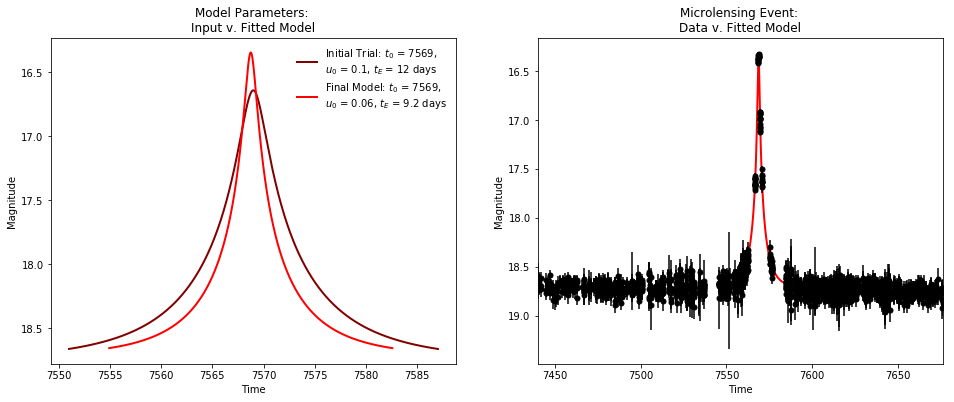

best fit: t_0 = 7568.75 days, u_0 = 0.059, t_E = 9.22
chi2 = 1010.0


In [6]:
# Connect the data with the model
ev = Event(datasets = data, model = model)

# Find the best-fit parameters
initial_guess = [t_0, u_0, t_E]
print(initial_guess)
result = op.minimize(
    chi2_fun, x0 = initial_guess, args = (ev, parameters_to_fit),
    method='Nelder-Mead')
(fit_t_0, fit_u_0, fit_t_E) = result.x

# Save the best-fit parameters
chi2 = chi2_fun(result.x, ev, parameters_to_fit)

# Plot and compare the two models
init_model = Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E})
final_model = Model({'t_0': fit_t_0, 'u_0': fit_u_0, 't_E': fit_t_E})
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
init_model.plot_lc(data_ref=data, label='Initial Trial: $t_0$ = 7569, \n$u_0$ = 0.1, $t_E$ = 12 days', color = 'maroon', linewidth = 2)
final_model.plot_lc(data_ref=data, label='Final Model: $t_0$ = 7569, \n$u_0$ = 0.06, $t_E$ = 9.2 days', color = 'r', linewidth = 2)
plt.title('Model Parameters: \nInput v. Fitted Model')
plt.legend(loc='best', frameon=False)

# Plot the fitted model with the data
plt.subplot(1,2,2)
ev.plot_data(color = 'k', zorder = 2)
ev.plot_model(color = 'r', zorder = 1, linewidth = 2)
plt.title('Microlensing Event: \nData v. Fitted Model')

plt.show()

# Output the fit parameters
msg = 'best fit: t_0 = {0:6.2f} days, u_0 = {1:4.3f}, t_E = {2:4.2f}'

print(msg.format(fit_t_0, fit_u_0, fit_t_E))
print('chi2 = {0:6.1f}'.format(chi2))
# print('scipy.optimize.minimize result:')
# print(result)

MulensModel successfully models the observed microlensing signal.